In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(style = "seaborn")
%matplotlib inline

In [130]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [67]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [68]:
train.fillna(-99, inplace = True)
test.fillna(-99, inplace = True)

In [69]:
# train.head()
# train["text"].value_counts()

In [70]:
#PLotting the distribution of the target variable
#EDA with text
disaster = train[train.target==1].shape[0]
non_disaster = train[train.target==0].shape[0]

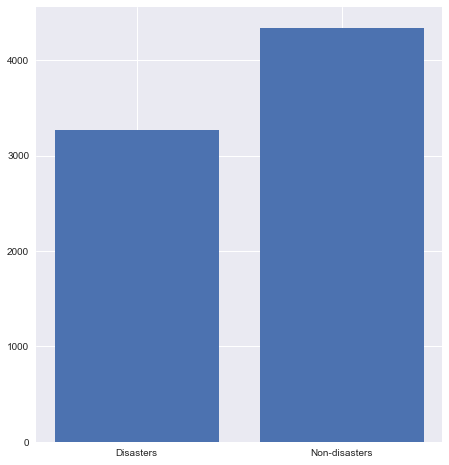

In [71]:
plt.figure(1, figsize = (16, 8))
plt.subplot(1, 2, 1)
_= plt.bar(["Disasters" , "Non-disasters"] , [disaster, non_disaster])

In [72]:
def plot_target_based_features(features):
    x1 = train[train.target==1][features]
    x2 = train[train.target==0][features]
    plt.figure(1, figsize = (16, 8))
    plt.subplot(1, 1, 1)
    p = plt.hist(x1 , alpha=0.5, color = "blue", bins = 50)
    p = plt.hist(x2 , alpha=0.7, color = "grey", bins = 50)
    return p

In [73]:
#length of the text

train["len_text"] = train.text.map(lambda x: len(x))

In [74]:
train.head()

,id,keyword,location,text,target,len_text
0,1,-99,-99,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,-99,-99,Forest fire near La Ronge Sask. Canada,1,38
2,5,-99,-99,All residents asked to 'shelter in place' are ...,1,133
3,6,-99,-99,"13,000 people receive #wildfires evacuation or...",1,65
4,7,-99,-99,Just got sent this photo from Ruby #Alaska as ...,1,88


(array([  9.,  10.,  10.,  25.,  23.,  30.,  43.,  36.,  55.,  74.,  60.,
         54.,  88.,  77.,  71.,  72.,  62.,  80.,  81.,  86.,  95.,  87.,
         79., 106., 103.,  96., 101., 105.,  90., 111., 106., 110.,  95.,
        110., 109., 119.,  94., 112., 123., 122., 123., 171., 192., 363.,
        288.,  65.,  16.,   3.,   1.,   1.]),
 array([  7.,  10.,  13.,  16.,  19.,  22.,  25.,  28.,  31.,  34.,  37.,
         40.,  43.,  46.,  49.,  52.,  55.,  58.,  61.,  64.,  67.,  70.,
         73.,  76.,  79.,  82.,  85.,  88.,  91.,  94.,  97., 100., 103.,
        106., 109., 112., 115., 118., 121., 124., 127., 130., 133., 136.,
        139., 142., 145., 148., 151., 154., 157.]),
 <a list of 50 Patch objects>)

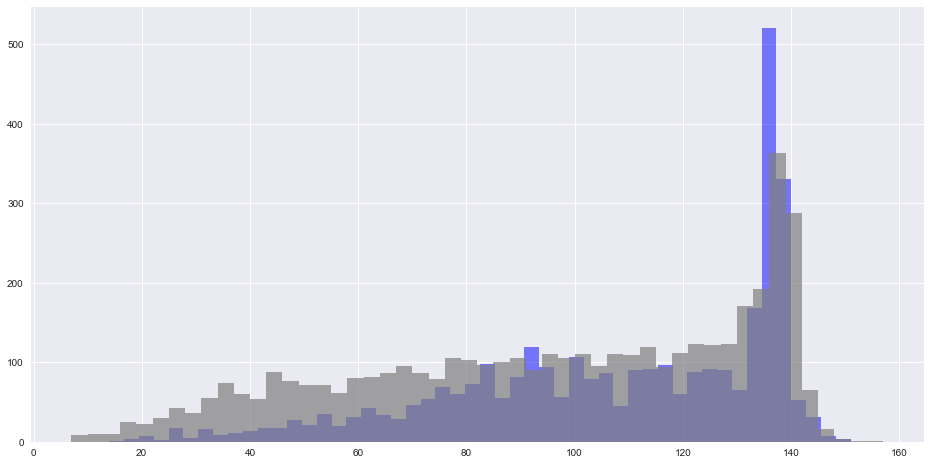

In [75]:
plot_target_based_features("len_text")

In [77]:
#number of words in the text feture

train["word_count"] = train.text.str.split().map(lambda x: len(x))

In [78]:
train.head()

,id,keyword,location,text,target,len_text,word_count
0,1,-99,-99,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,-99,-99,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,-99,-99,All residents asked to 'shelter in place' are ...,1,133,22
3,6,-99,-99,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,-99,-99,Just got sent this photo from Ruby #Alaska as ...,1,88,16


(array([  8.,  30.,   0.,  62.,   0.,  91., 120.,   0., 134.,   0., 159.,
        160.,   0., 220.,   0., 185., 276.,   0., 229.,   0., 227., 243.,
          0., 214.,   0., 260., 251.,   0., 217.,   0., 199., 223.,   0.,
        163.,   0., 153., 131.,   0., 132.,   0.,  87.,  76.,   0.,  41.,
          0.,  35.,   9.,   0.,   4.,   3.]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ,
         7.6,  8.2,  8.8,  9.4, 10. , 10.6, 11.2, 11.8, 12.4, 13. , 13.6,
        14.2, 14.8, 15.4, 16. , 16.6, 17.2, 17.8, 18.4, 19. , 19.6, 20.2,
        20.8, 21.4, 22. , 22.6, 23.2, 23.8, 24.4, 25. , 25.6, 26.2, 26.8,
        27.4, 28. , 28.6, 29.2, 29.8, 30.4, 31. ]),
 <a list of 50 Patch objects>)

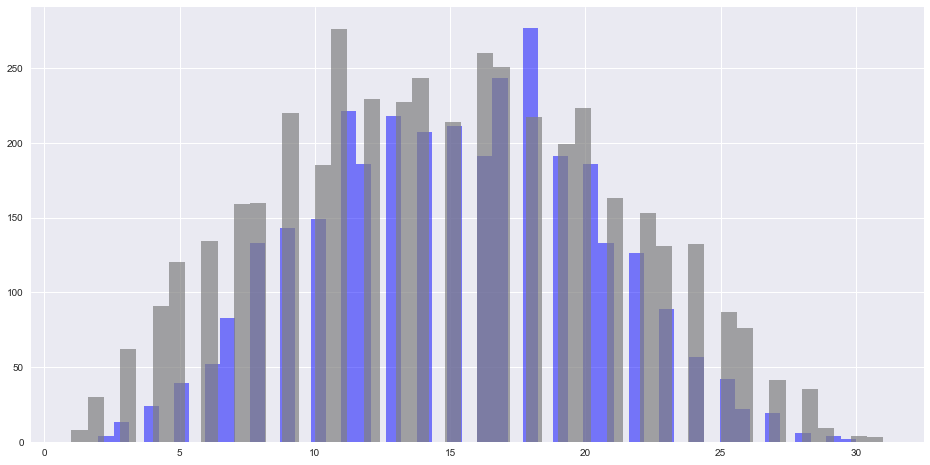

In [79]:
plot_target_based_features("word_count")

In [80]:
train["unique_word"] = train.text.str.split().map(lambda x : len(set(x)))

(array([  8.,  32.,   0.,  62.,   0.,  91.,   0., 121., 138.,   0., 164.,
          0., 171.,   0., 250.,   0., 183., 277.,   0., 250.,   0., 253.,
          0., 257., 246.,   0., 273.,   0., 256.,   0., 239.,   0., 235.,
        215.,   0., 168.,   0., 137.,   0., 136.,   0.,  91.,  44.,   0.,
         29.,   0.,  12.,   0.,   3.,   1.]),
 array([ 1.  ,  1.56,  2.12,  2.68,  3.24,  3.8 ,  4.36,  4.92,  5.48,
         6.04,  6.6 ,  7.16,  7.72,  8.28,  8.84,  9.4 ,  9.96, 10.52,
        11.08, 11.64, 12.2 , 12.76, 13.32, 13.88, 14.44, 15.  , 15.56,
        16.12, 16.68, 17.24, 17.8 , 18.36, 18.92, 19.48, 20.04, 20.6 ,
        21.16, 21.72, 22.28, 22.84, 23.4 , 23.96, 24.52, 25.08, 25.64,
        26.2 , 26.76, 27.32, 27.88, 28.44, 29.  ]),
 <a list of 50 Patch objects>)

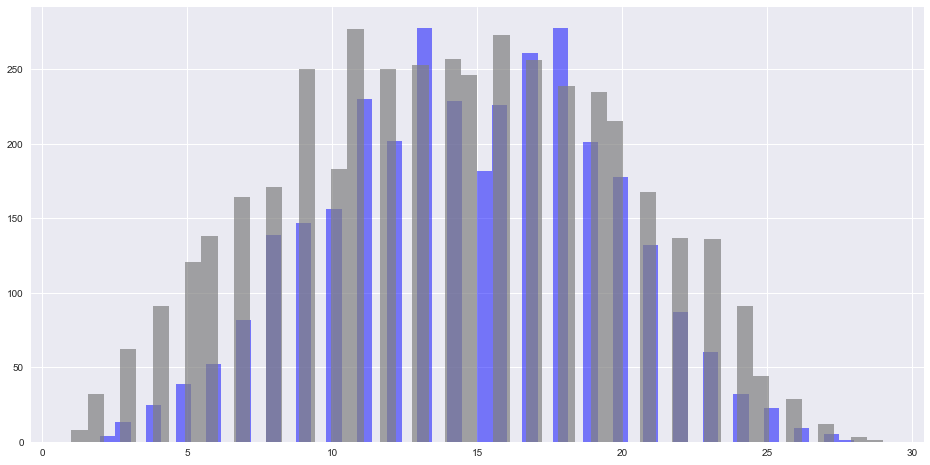

In [81]:
plot_target_based_features("unique_word")

In [82]:
train["unique_word"] = train.text.map(lambda x : len(set(str(x).split())))

(array([  8.,  32.,   0.,  62.,   0.,  91.,   0., 121., 138.,   0., 164.,
          0., 171.,   0., 250.,   0., 183., 277.,   0., 250.,   0., 253.,
          0., 257., 246.,   0., 273.,   0., 256.,   0., 239.,   0., 235.,
        215.,   0., 168.,   0., 137.,   0., 136.,   0.,  91.,  44.,   0.,
         29.,   0.,  12.,   0.,   3.,   1.]),
 array([ 1.  ,  1.56,  2.12,  2.68,  3.24,  3.8 ,  4.36,  4.92,  5.48,
         6.04,  6.6 ,  7.16,  7.72,  8.28,  8.84,  9.4 ,  9.96, 10.52,
        11.08, 11.64, 12.2 , 12.76, 13.32, 13.88, 14.44, 15.  , 15.56,
        16.12, 16.68, 17.24, 17.8 , 18.36, 18.92, 19.48, 20.04, 20.6 ,
        21.16, 21.72, 22.28, 22.84, 23.4 , 23.96, 24.52, 25.08, 25.64,
        26.2 , 26.76, 27.32, 27.88, 28.44, 29.  ]),
 <a list of 50 Patch objects>)

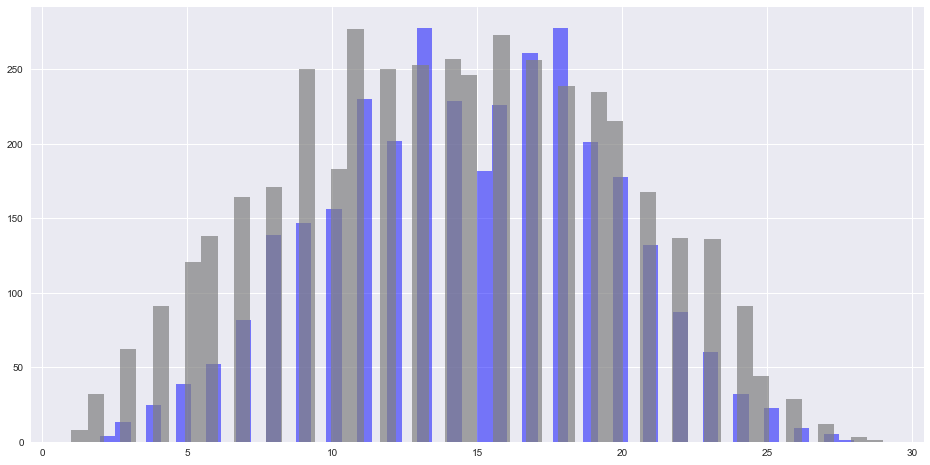

In [83]:
plot_target_based_features("unique_word")

In [84]:
#mean word length

train["mean_word_length"] = train.text.map(lambda x : np.mean([len(w) for w in str(x).split()]))

(array([  2.,   6.,  16.,  43., 118., 239., 276., 358., 393., 327., 307.,
        308., 283., 220., 225., 221., 190., 152., 158.,  88.,  74.,  64.,
         48.,  55.,  37.,  24.,  13.,  11.,   8.,  11.,   8.,   6.,  14.,
          6.,   3.,   3.,   6.,   2.,   5.,   3.,   1.,   0.,   0.,   1.,
          1.,   3.,   0.,   2.,   2.,   1.]),
 array([ 2.25      ,  2.54214286,  2.83428571,  3.12642857,  3.41857143,
         3.71071429,  4.00285714,  4.295     ,  4.58714286,  4.87928571,
         5.17142857,  5.46357143,  5.75571429,  6.04785714,  6.34      ,
         6.63214286,  6.92428571,  7.21642857,  7.50857143,  7.80071429,
         8.09285714,  8.385     ,  8.67714286,  8.96928571,  9.26142857,
         9.55357143,  9.84571429, 10.13785714, 10.43      , 10.72214286,
        11.01428571, 11.30642857, 11.59857143, 11.89071429, 12.18285714,
        12.475     , 12.76714286, 13.05928571, 13.35142857, 13.64357143,
        13.93571429, 14.22785714, 14.52      , 14.81214286, 15.10428571,
 

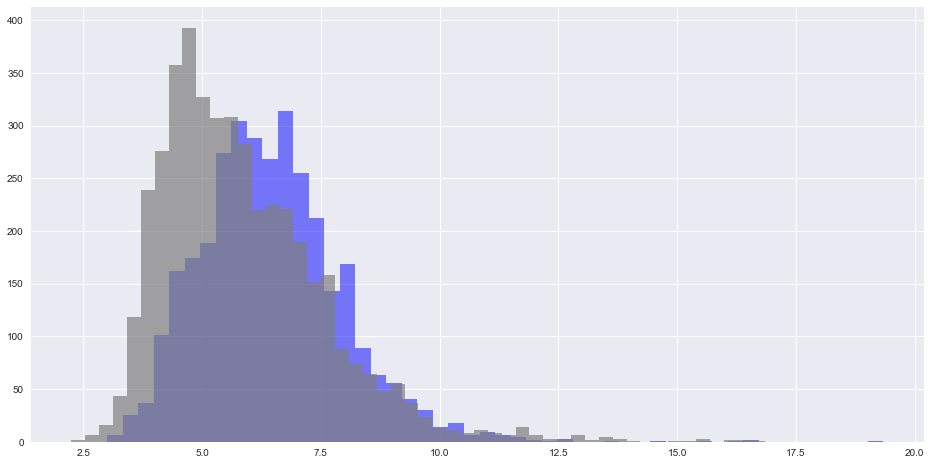

In [85]:
plot_target_based_features("mean_word_length")

In [86]:
#punctuation count

import string

train["punct_words"] = train.text.map(lambda x : len([c for c in str(x) if c in string.punctuation]))

(array([671., 400., 381., 303., 745., 310., 258., 219., 226., 410., 136.,
         86.,  76.,  50.,  16.,  11.,   5.,   1.,  13.,   0.,   9.,   2.,
          5.,   1.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  1.22,  2.44,  3.66,  4.88,  6.1 ,  7.32,  8.54,  9.76,
        10.98, 12.2 , 13.42, 14.64, 15.86, 17.08, 18.3 , 19.52, 20.74,
        21.96, 23.18, 24.4 , 25.62, 26.84, 28.06, 29.28, 30.5 , 31.72,
        32.94, 34.16, 35.38, 36.6 , 37.82, 39.04, 40.26, 41.48, 42.7 ,
        43.92, 45.14, 46.36, 47.58, 48.8 , 50.02, 51.24, 52.46, 53.68,
        54.9 , 56.12, 57.34, 58.56, 59.78, 61.  ]),
 <a list of 50 Patch objects>)

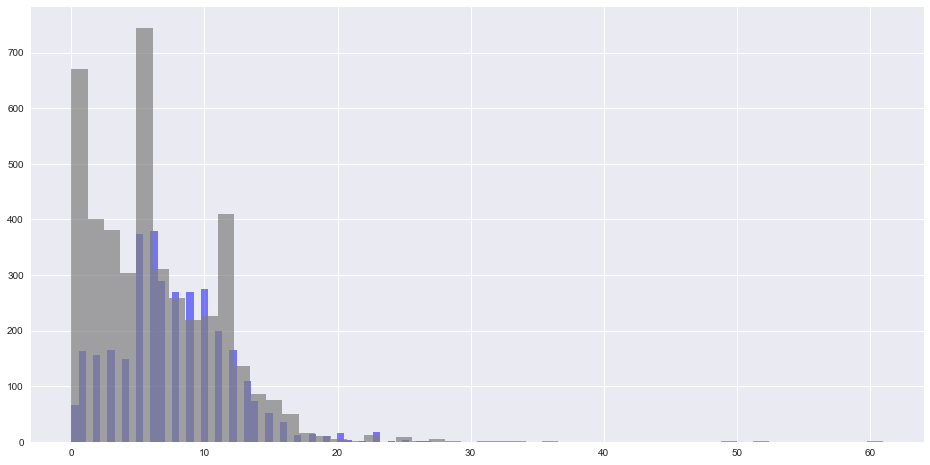

In [87]:
plot_target_based_features("punct_words")

In [88]:
#text preprocessing
#create the corpus

def create_corpus(df, target):
    corp = []
    for x in df[df["target"]==target].text.str.split():
        for i in x:
            corp.append(i)
    return corp

In [89]:
corpus1 = create_corpus(train, 1)
corpus0 = create_corpus(train, 0)

In [90]:
# corpus1

In [91]:
#first visualize the stopwords and then remove them
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stops = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asmeeta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
from collections import defaultdict

In [93]:
d0 = defaultdict(int)
for x in corpus0:
    if x in stops:
        d0[x] +=1

d1 = defaultdict(int)
for x in corpus1:
    if x in stops:
        d1[x] +=1

In [94]:
top0=sorted(d0.items(), key = lambda x: x[1], reverse = True)[:10]
top1=sorted(d1.items(), key = lambda x: x[1], reverse = True)[:10]

In [95]:
x0,y0 = zip(*top0)

In [96]:
x1, y1 = zip(*top1)

<BarContainer object of 10 artists>

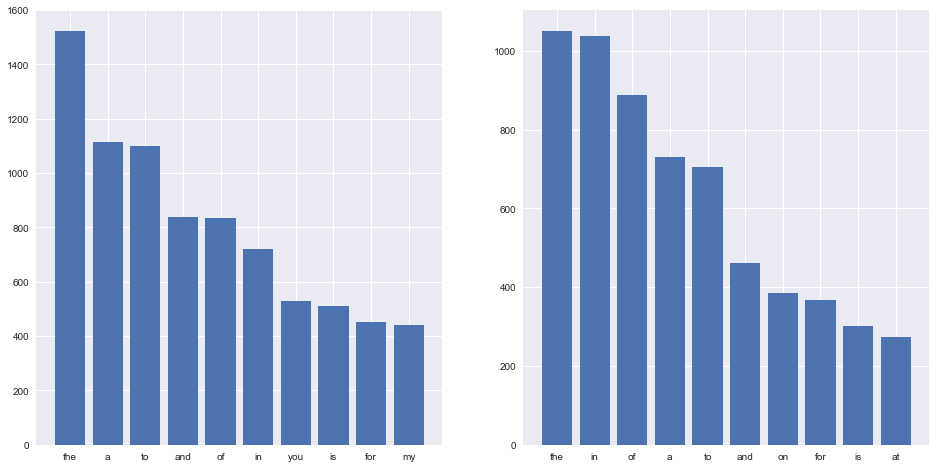

In [97]:
plt.figure(1, figsize = (16,8))
plt.subplot(1,2,1)
plt.bar(x0,y0)
plt.subplot(1,2,2)
plt.bar(x1,y1)

In [98]:
#visualize punctuation

d0 = defaultdict(int)
for x in corpus0:
    if x in string.punctuation:
        d0[x] +=1
        
d1 = defaultdict(int)
for x in corpus1:
    if x in string.punctuation:
        d1[x] +=1

In [99]:
top0 = sorted(d0.items(), key = lambda x:x[1], reverse = True)[:10]
top1 = sorted(d1.items(), key = lambda x:x[1], reverse = True)[:10]

In [100]:
x0,y0 = zip(*top0)
x1,y1 = zip(*top1)

<BarContainer object of 10 artists>

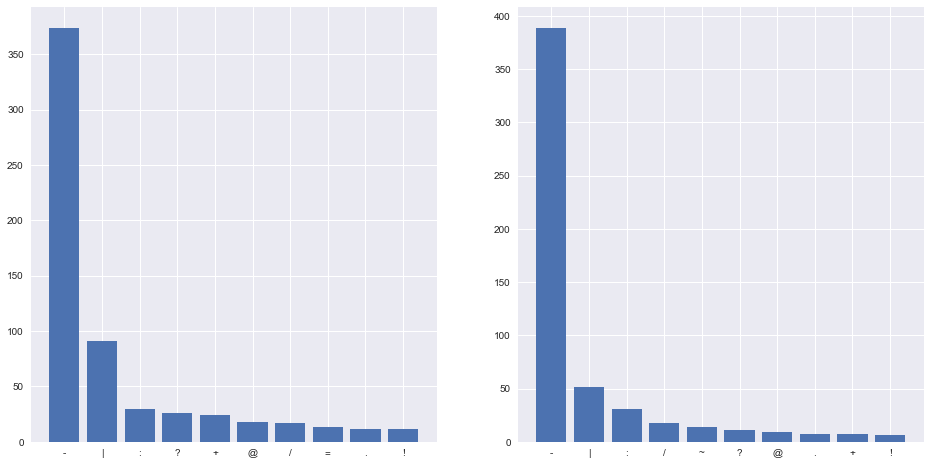

In [101]:
plt.figure(1,figsize = (16,8))
plt.subplot(1,2,1)
plt.bar(x0,y0)
plt.subplot(1,2,2)
plt.bar(x1,y1)

In [102]:
#remove URL

import re

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)
        

In [103]:
#html

def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"",text)

In [104]:
#remove emoji

def remove_emoji(string):
    emoji_pattern = re.compile(
    "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U00002780"
        u"\U000024C2-\U0001F251"
        "]+",
        flags = re.UNICODE,
        )
    return emoji_pattern.sub(r"",string)

In [105]:
#remove punctuation 

def remove_punc(text):
    new_text = [x for x in text.split() if x not in string.punctuation]
    new_text = " ".join(new_text)
    return new_text

In [106]:
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stops]
    return " ".join(text)

In [129]:
# train["text"]

In [131]:
train["text"] = train.text.apply(remove_URL)
train["text"] = train.text.apply(remove_html)
train["text"] = train.text.apply(remove_emoji)
train["text"] = train.text.apply(remove_punc)
train["text"] = train.text.apply(remove_stopwords)

In [132]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason #earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,residents asked 'shelter place' notified offic...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,got sent photo ruby #alaska smoke #wildfires p...,1


In [133]:
# plot a wordcloud

from wordcloud import WordCloud

In [134]:
corpus0 = create_corpus(train,0)
corpus1 = create_corpus(train,1)

In [135]:
word0 = WordCloud(background_color = "white", max_font_size = 80).generate(" ".join(corpus0[:50]))
word1 = WordCloud(background_color = "white", max_font_size = 80).generate(" ".join(corpus1[:50]))

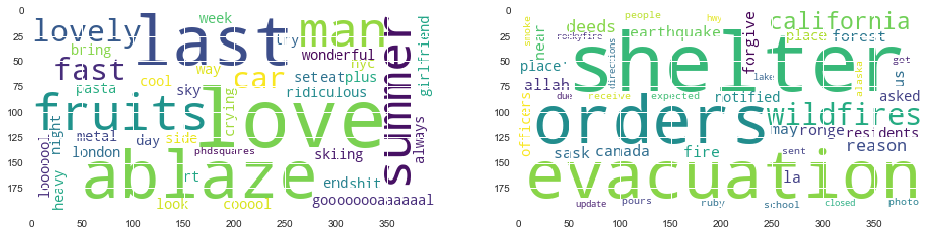

In [136]:
plt.figure(1, figsize = (16,8))
plt.subplot(1,2,1)
plt.imshow(word0)
plt.subplot(1,2,2)
plt.imshow(word1)

In [137]:
#stemming
from nltk.stem.porter import PorterStemmer

In [138]:
stem = PorterStemmer()

In [139]:
def stemming(text):
    text = [stem.stem(word) for word in text.split()]

    return " ".join(text)

In [140]:
train["text"] = train["text"].apply(stemming)

In [119]:
#tokening

from nltk.tokenize import TreebankWordTokenizer

In [120]:
token = TreebankWordTokenizer()

In [121]:
train["text"] = train["text"].apply(token.tokenize)

In [122]:
#bag of words : it associates ab indx to each word in the vocabulary and embeds each sentence asa list 0 and 1, witha 1 at each index corrresponding to word present n the sentence.

In [ ]:
# https://www.kaggle.com/vbmokin/nlp-eda-bag-of-wc-tf-idf-glove

In [141]:
from sklearn.feature_extraction.text import CountVectorizer

In [142]:
count = CountVectorizer()

In [173]:
train_count = count.fit_transform(train["text"])

In [174]:
train_count.shape

(7613, 15349)

In [146]:
test_count = count.transform(test["text"])

In [147]:
from sklearn.feature_extraction.text import TfidfTransformer

In [150]:
tf = TfidfTransformer()

In [152]:
train_tf = tf.fit_transform(train_count)

In [153]:
test_tf = tf.transform(test_count)

In [155]:
train_tf.shape

(7613, 15349)

In [175]:
#visualization 
X_counts = train_count
X_tfidf = train_tf
y = train["target"].values


In [176]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import matplotlib

In [183]:
def plot_LSA(test_data, test_labels, plot = True):
    lsa = TruncatedSVD(n_components = 2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label: idx for idx, label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ["orange","blue","blue"]
    if plot:
        plt.scatter(
        lsa_scores[:,0],
        lsa_scores[:,1],
        s = 8,
        alpha = 0.8,
        c=test_labels,
        cmap = matplotlib.colors.ListedColormap(colors),
            )
        red_patch = mpatches.Patch(color = "orange", label = "Irrelevant")
        green_patch = mpatches.Patch(color= "blue", label = "Disaster")
        plt.legend(handles = (red_patch, green_patch), prop = {"size":16})

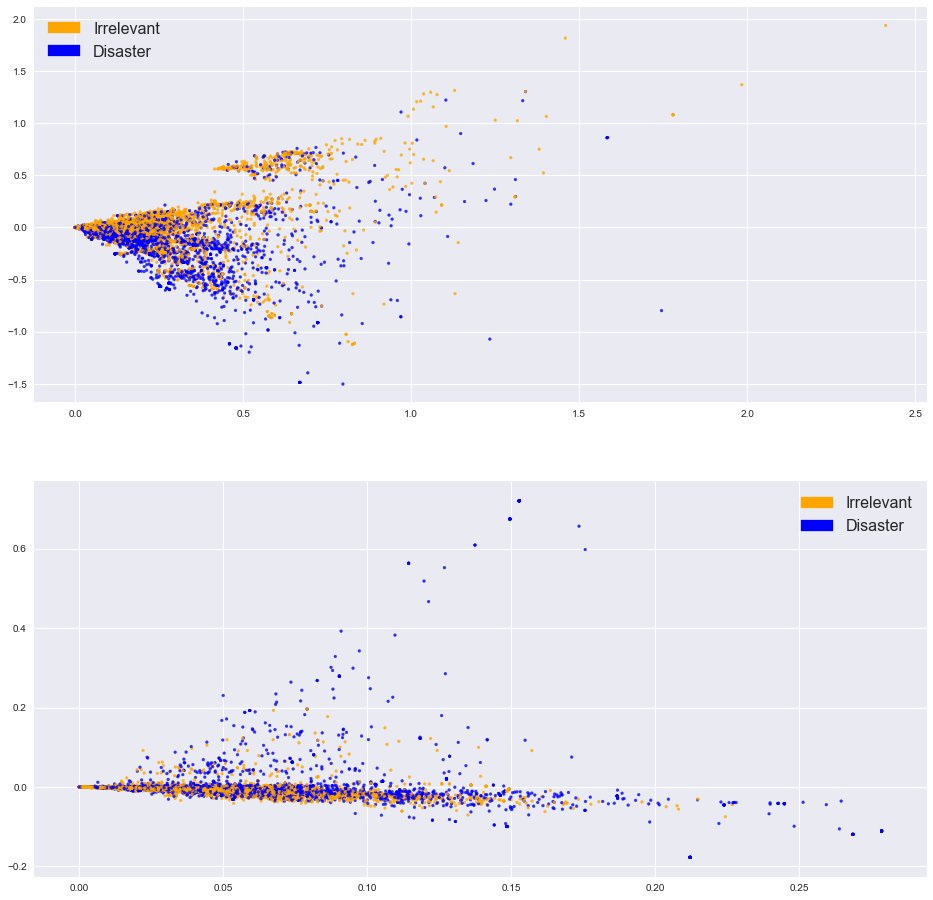

In [185]:
plt.figure(1, figsize = (16,16))
plt.subplot(2,1,1)
plot_LSA(X_counts, y)
plt.subplot(2,1,2)
plot_LSA(X_tfidf,y)

In [ ]:
#tfidf does better in linearly separate the values

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [190]:
train_count

<7613x15349 sparse matrix of type '<class 'numpy.int64'>'
	with 70560 stored elements in Compressed Sparse Row format>

In [191]:
X = train_count
y =  train["target"].values

In [192]:
X_train_count, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [196]:
log = LogisticRegression(class_weight = "balanced")

In [197]:
log.fit(X_train_count,y_train)

C:\Users\Asmeeta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [198]:
y_pred = log.predict(X_test)

C:\Users\Asmeeta\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [199]:
print(f1_score(y_test,y_pred))

0.7490272373540856


In [202]:
X = X_tfidf 
y =  train["target"].values

In [204]:
X_train_count, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [205]:
log = LogisticRegression(class_weight = "balanced")
log.fit(X_train_count,y_train)
y_pred = log.predict(X_test)

C:\Users\Asmeeta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asmeeta\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [206]:
print(f1_score(y_test,y_pred))

0.7470238095238095
